# Librabries 

In [ ]:
# Setup and Imports
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Add src to path
sys.path.append('../src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio, display
import librosa

from preprocessing import AudioPreprocessor
from data_loader import CardiacDatasetLoader

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Imports successful")

# 1. Data Loading and Exploration

# Initialize data loader
loader = CardiacDatasetLoader(
    train_dir='../data/train/training',
    test_dir='../data/validation'
 )

Imports successful
Found 6 training subsets:
   - training-a
   - training-b
   - training-c
   - training-d
   - training-e
   - training-f


## 1. Data Loading and Exploration


Loading training labels...
   Loaded 409 files from training-a
   Loaded 490 files from training-b
   Loaded 31 files from training-c
   Loaded 55 files from training-d
   Loaded 490 files from training-b
   Loaded 31 files from training-c
   Loaded 55 files from training-d
   Loaded 2141 files from training-e
   Loaded 114 files from training-f

Training Dataset Summary:
   Total files: 3240
   Normal (0): 2575
   Abnormal (1): 665
   Class balance: 20.5% abnormal

Dataset Overview:
Total samples: 3240

Columns: ['filename', 'label', 'wav_path', 'subset', 'label_binary', 'label_name']

First few rows:
   Loaded 2141 files from training-e
   Loaded 114 files from training-f

Training Dataset Summary:
   Total files: 3240
   Normal (0): 2575
   Abnormal (1): 665
   Class balance: 20.5% abnormal

Dataset Overview:
Total samples: 3240

Columns: ['filename', 'label', 'wav_path', 'subset', 'label_binary', 'label_name']

First few rows:


,filename,label,wav_path,subset,label_binary,label_name
0,a0001,1,..\data\train\training\training-a\a0001.wav,training-a,1,abnormal
1,a0002,1,..\data\train\training\training-a\a0002.wav,training-a,1,abnormal
2,a0003,1,..\data\train\training\training-a\a0003.wav,training-a,1,abnormal
3,a0004,1,..\data\train\training\training-a\a0004.wav,training-a,1,abnormal
4,a0005,1,..\data\train\training\training-a\a0005.wav,training-a,1,abnormal
5,a0006,1,..\data\train\training\training-a\a0006.wav,training-a,1,abnormal
6,a0007,-1,..\data\train\training\training-a\a0007.wav,training-a,0,normal
7,a0008,1,..\data\train\training\training-a\a0008.wav,training-a,1,abnormal
8,a0009,-1,..\data\train\training\training-a\a0009.wav,training-a,0,normal
9,a0010,1,..\data\train\training\training-a\a0010.wav,training-a,1,abnormal


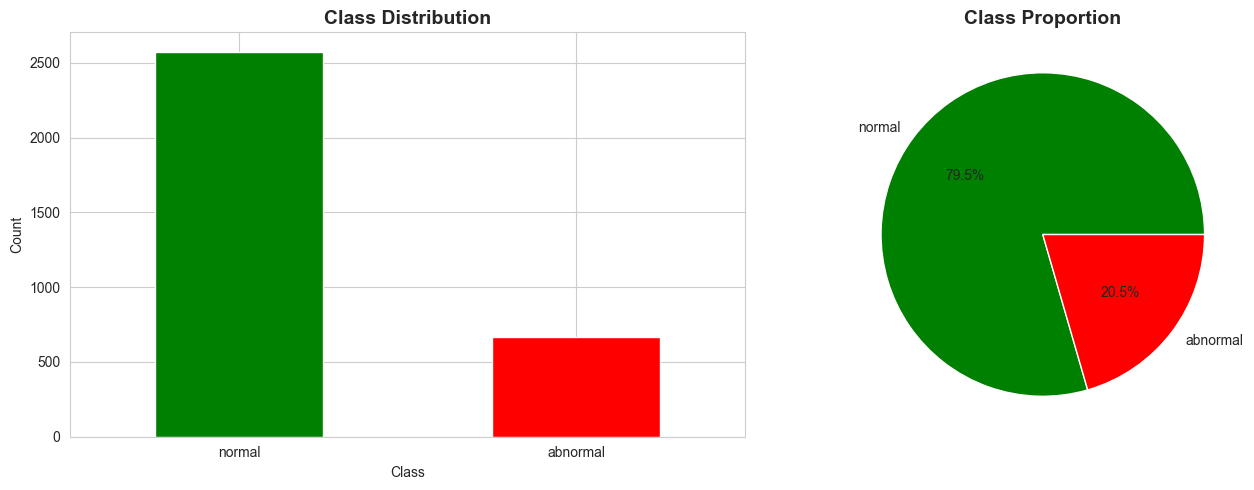


Class Balance:
label_name
normal      2575
abnormal     665
Name: count, dtype: int64

Percentage abnormal: 20.5%


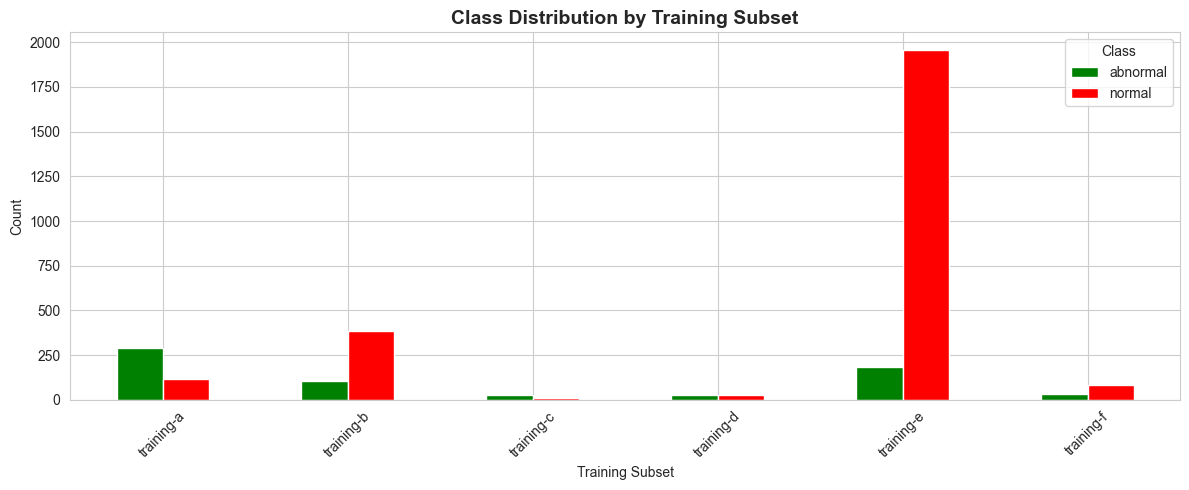


Samples per subset:
label_name  abnormal  normal
subset                      
training-a       292     117
training-b       104     386
training-c        24       7
training-d        28      27
training-e       183    1958
training-f        34      80


In [5]:
# Load all training labels
train_df = loader.load_all_training_labels()

print(f"\nDataset Overview:")
print(f"Total samples: {len(train_df)}")
print(f"\nColumns: {train_df.columns.tolist()}")
print(f"\nFirst few rows:")
display(train_df.head(10))

# Class Distribution Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
train_df['label_name'].value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Pie chart
train_df['label_name'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=['green', 'red'])
axes[1].set_title('Class Proportion', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.savefig('../outputs/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Class balance check
print("\nClass Balance:")
print(train_df['label_name'].value_counts())
print(f"\nPercentage abnormal: {(train_df['label_binary'] == 1).mean() * 100:.1f}%")

# Distribution by Subset
subset_distribution = train_df.groupby(['subset', 'label_name']).size().unstack(fill_value=0)

subset_distribution.plot(kind='bar', stacked=False, figsize=(12, 5), color=['green', 'red'])
plt.title('Class Distribution by Training Subset', fontsize=14, fontweight='bold')
plt.xlabel('Training Subset')
plt.ylabel('Count')
plt.legend(title='Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../outputs/subset_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nSamples per subset:")
print(subset_distribution)


# 2. Audio Preprocessing and Feature Extraction

Preprocessor Configuration:
  Sample Rate: 4000 Hz
  Segment Duration: 5.0 seconds
  Segment Samples: 20000
  Mel Bands: 128
Normal sample: e01195
Abnormal sample: a0392

Waveform shapes:
  Normal: (20000,)
  Abnormal: (20000,)

Waveform shapes:
  Normal: (20000,)
  Abnormal: (20000,)


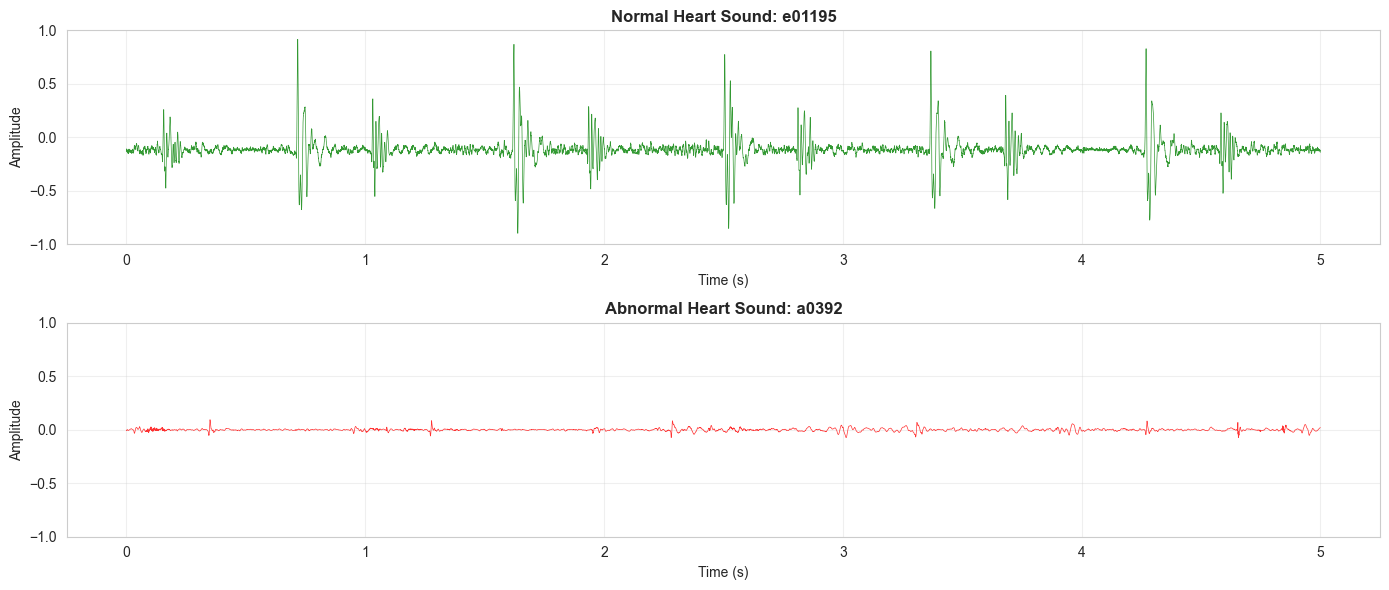


Normal heart sound:



Abnormal heart sound:


Mel spectrogram shapes:
  Normal: (128, 79, 1)
  Abnormal: (128, 79, 1)


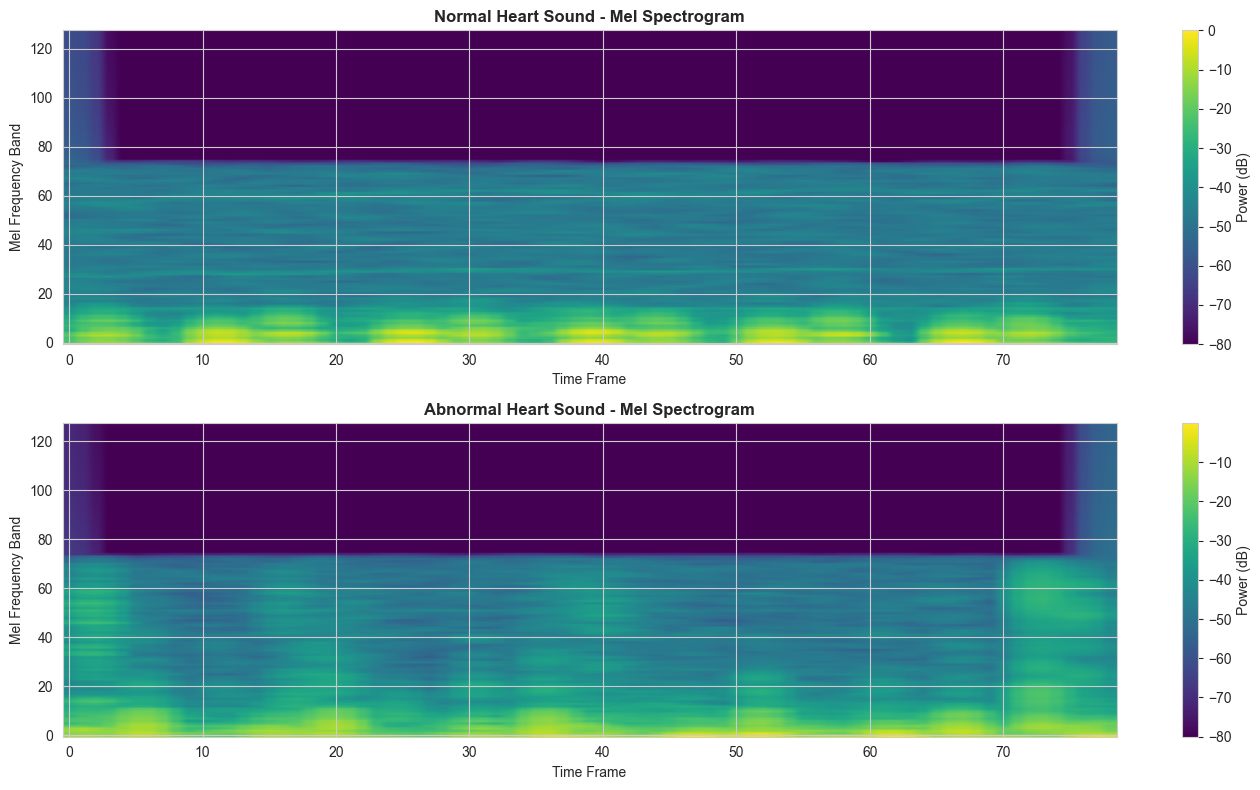

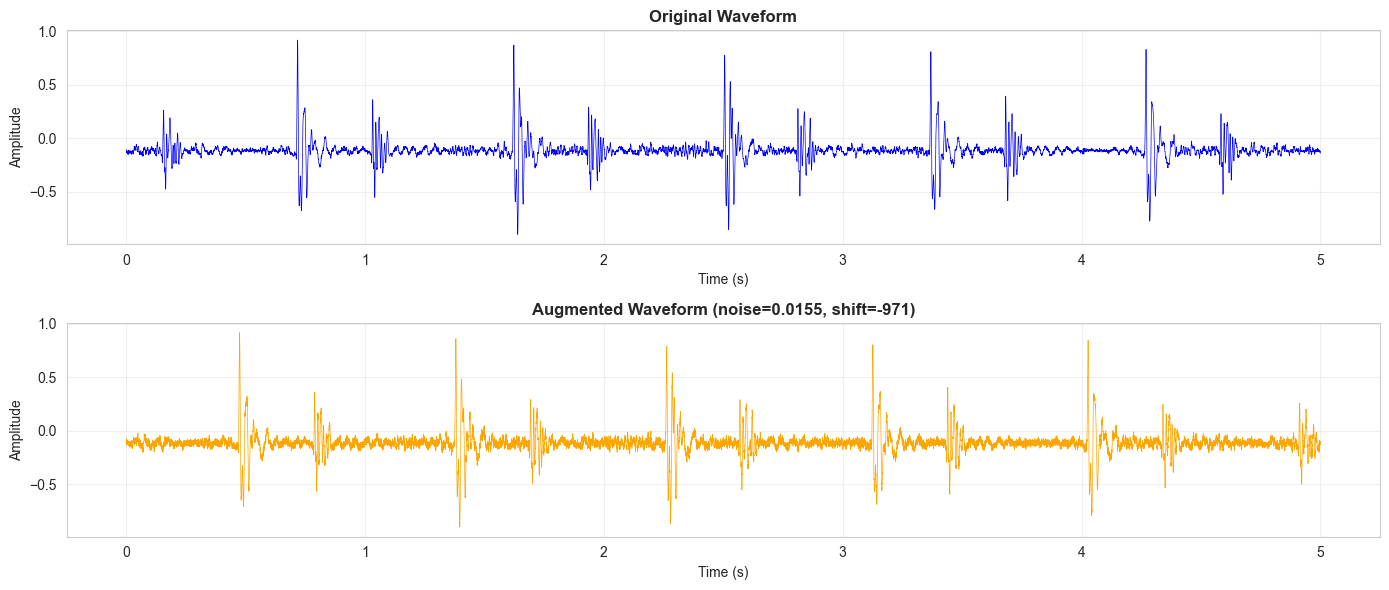

In [6]:
# Initialize Preprocessor
preprocessor = AudioPreprocessor(
    target_sample_rate=4000,
    segment_seconds=5.0,
    n_mels=128,
    mel_hop_length=256
)

print(f"Preprocessor Configuration:")
print(f"  Sample Rate: {preprocessor.target_sample_rate} Hz")
print(f"  Segment Duration: {preprocessor.segment_seconds} seconds")
print(f"  Segment Samples: {preprocessor.segment_samples}")
print(f"  Mel Bands: {preprocessor.n_mels}")

# Load Sample Audio Files
# Get one normal and one abnormal sample
normal_sample = train_df[train_df['label_binary'] == 0].sample(1, random_state=42).iloc[0]
abnormal_sample = train_df[train_df['label_binary'] == 1].sample(1, random_state=42).iloc[0]

print(f"Normal sample: {normal_sample['filename']}")
print(f"Abnormal sample: {abnormal_sample['filename']}")

# Load waveforms
normal_wave = preprocessor.load_waveform(Path(normal_sample['wav_path']))
abnormal_wave = preprocessor.load_waveform(Path(abnormal_sample['wav_path']))

print(f"\nWaveform shapes:")
print(f"  Normal: {normal_wave.shape}")
print(f"  Abnormal: {abnormal_wave.shape}")

# Visualize Waveforms
fig, axes = plt.subplots(2, 1, figsize=(14, 6))

time = np.linspace(0, preprocessor.segment_seconds, len(normal_wave))

# Normal
axes[0].plot(time, normal_wave, color='green', linewidth=0.5, alpha=0.8)
axes[0].set_title(f'Normal Heart Sound: {normal_sample["filename"]}', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(-1, 1)

# Abnormal
axes[1].plot(time, abnormal_wave, color='red', linewidth=0.5, alpha=0.8)
axes[1].set_title(f'Abnormal Heart Sound: {abnormal_sample["filename"]}', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Amplitude')
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim(-1, 1)

plt.tight_layout()
plt.savefig('../outputs/waveform_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Play audio samples
print("\nNormal heart sound:")
display(Audio(normal_wave, rate=preprocessor.target_sample_rate))

print("\nAbnormal heart sound:")
display(Audio(abnormal_wave, rate=preprocessor.target_sample_rate))

# Extract Mel Spectrograms
normal_mel = preprocessor.to_mel_spectrogram(normal_wave)
abnormal_mel = preprocessor.to_mel_spectrogram(abnormal_wave)

print(f"Mel spectrogram shapes:")
print(f"  Normal: {normal_mel.shape}")
print(f"  Abnormal: {abnormal_mel.shape}")

# Visualize Mel Spectrograms
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Normal
im1 = axes[0].imshow(normal_mel[:, :, 0], aspect='auto', origin='lower', cmap='viridis')
axes[0].set_title(f'Normal Heart Sound - Mel Spectrogram', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Time Frame')
axes[0].set_ylabel('Mel Frequency Band')
plt.colorbar(im1, ax=axes[0], label='Power (dB)')

# Abnormal
im2 = axes[1].imshow(abnormal_mel[:, :, 0], aspect='auto', origin='lower', cmap='viridis')
axes[1].set_title(f'Abnormal Heart Sound - Mel Spectrogram', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Time Frame')
axes[1].set_ylabel('Mel Frequency Band')
plt.colorbar(im2, ax=axes[1], label='Power (dB)')

plt.tight_layout()
plt.savefig('../outputs/mel_spectrogram_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Test Data Augmentation
augmented_wave, aug_metadata = preprocessor.augment(normal_wave)

fig, axes = plt.subplots(2, 1, figsize=(14, 6))

# Original
axes[0].plot(time, normal_wave, color='blue', linewidth=0.5)
axes[0].set_title('Original Waveform', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True, alpha=0.3)

# Augmented
axes[1].plot(time, augmented_wave, color='orange', linewidth=0.5)
axes[1].set_title(f'Augmented Waveform (noise={aug_metadata["noise_factor"]:.4f}, shift={aug_metadata["time_shift"]:.0f})', 
                 fontsize=12, fontweight='bold')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Amplitude')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/augmentation_example.png', dpi=300, bbox_inches='tight')
plt.show()


## 3. Feature Interpretation

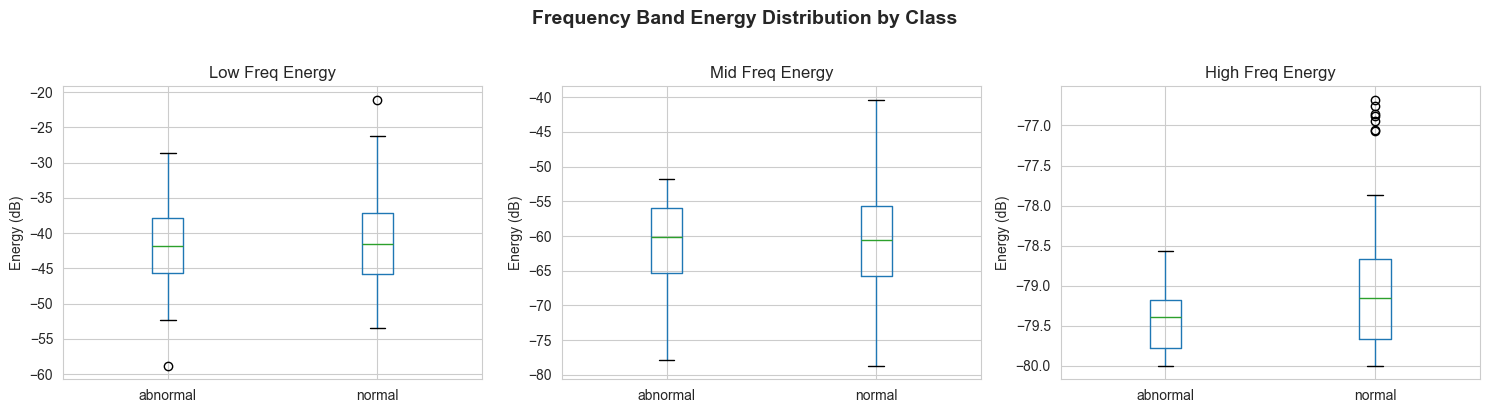


Frequency Band Statistics:
           low_freq   mid_freq  high_freq
label                                    
abnormal -42.233833 -61.675873 -79.411156
normal   -41.564323 -61.278446 -78.975990


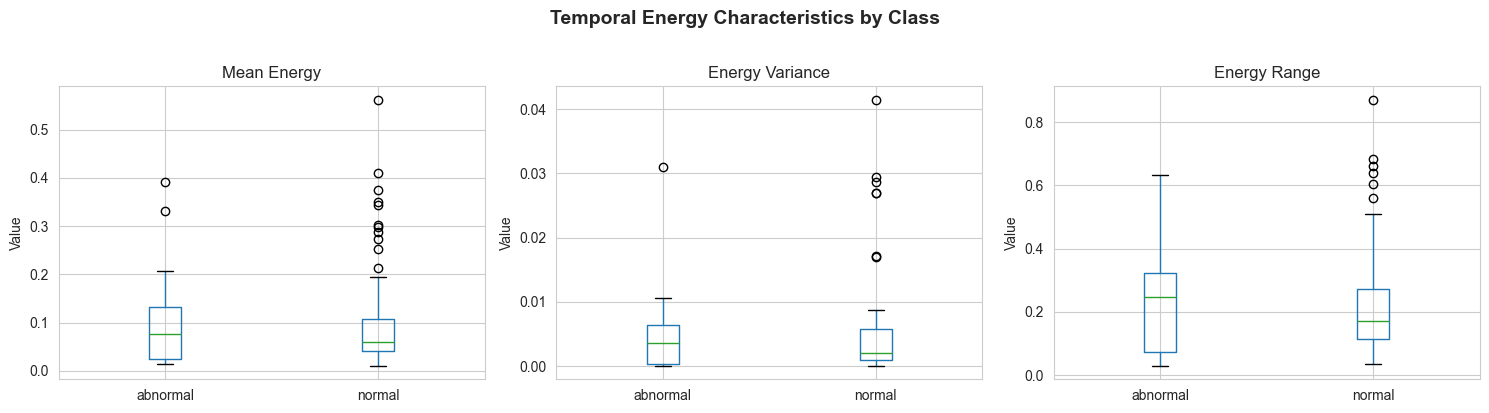


Temporal Energy Statistics:
          mean_energy  energy_variance  energy_range
label                                               
abnormal     0.102813         0.004702      0.224800
normal       0.104440         0.004956      0.221622


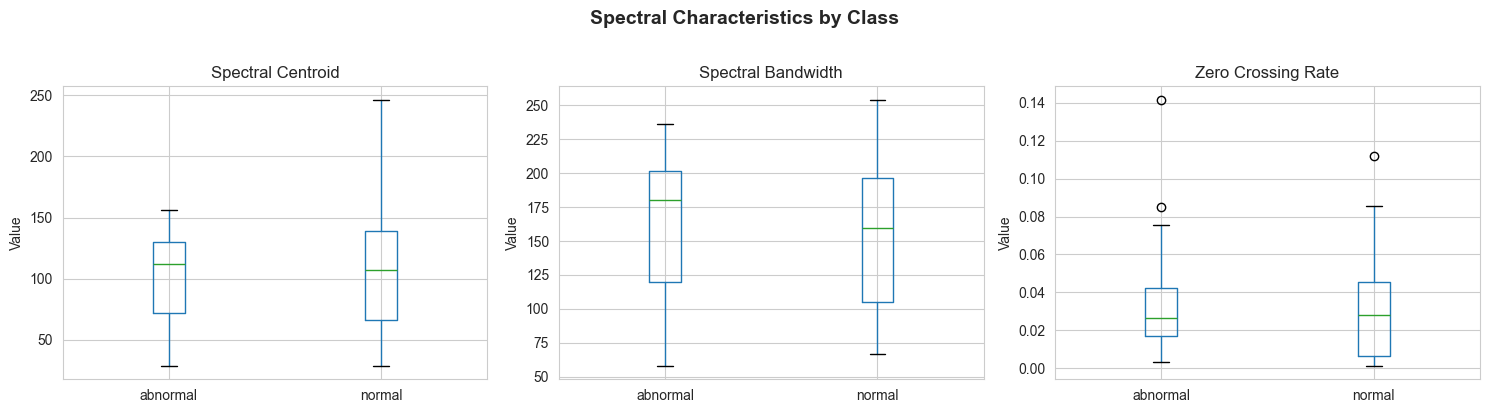


Spectral Feature Statistics:
          spectral_centroid  spectral_bandwidth  zero_crossing_rate
label                                                              
abnormal         102.547720          159.395866            0.035802
normal           106.718383          151.094214            0.031376


In [7]:
# Feature 1: Frequency Band Energy Distribution
def analyze_frequency_bands(df, n_samples=50):
    """Analyze energy distribution across frequency bands"""
    results = []
    
    for _, row in df.sample(min(n_samples, len(df)), random_state=42).iterrows():
        try:
            wave = preprocessor.load_waveform(Path(row['wav_path']))
            mel = preprocessor.to_mel_spectrogram(wave)[:, :, 0]
            
            # Divide into low, mid, high frequency bands
            n_bands = mel.shape[0]
            low_energy = mel[:n_bands//3, :].mean()
            mid_energy = mel[n_bands//3:2*n_bands//3, :].mean()
            high_energy = mel[2*n_bands//3:, :].mean()
            
            results.append({
                'label': row['label_name'],
                'low_freq': low_energy,
                'mid_freq': mid_energy,
                'high_freq': high_energy
            })
        except:
            continue
    
    return pd.DataFrame(results)

freq_features = analyze_frequency_bands(train_df, n_samples=100)

# Plot frequency band distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, band in enumerate(['low_freq', 'mid_freq', 'high_freq']):
    freq_features.boxplot(column=band, by='label', ax=axes[idx])
    axes[idx].set_title(f'{band.replace("_", " ").title()} Energy')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Energy (dB)')
    plt.sca(axes[idx])
    plt.xticks(rotation=0)

plt.suptitle('Frequency Band Energy Distribution by Class', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../outputs/frequency_band_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nFrequency Band Statistics:")
print(freq_features.groupby('label').mean())

# Feature 2: Temporal Energy Patterns
def analyze_temporal_energy(df, n_samples=50):
    """Analyze temporal energy patterns"""
    results = []
    
    for _, row in df.sample(min(n_samples, len(df)), random_state=42).iterrows():
        try:
            wave = preprocessor.load_waveform(Path(row['wav_path']))
            
            # Compute energy over time
            frame_length = 512
            hop_length = 256
            rms_energy = librosa.feature.rms(y=wave, frame_length=frame_length, hop_length=hop_length)[0]
            
            results.append({
                'label': row['label_name'],
                'mean_energy': rms_energy.mean(),
                'energy_variance': rms_energy.var(),
                'energy_range': rms_energy.max() - rms_energy.min()
            })
        except:
            continue
    
    return pd.DataFrame(results)

temporal_features = analyze_temporal_energy(train_df, n_samples=100)

# Plot temporal features
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, feature in enumerate(['mean_energy', 'energy_variance', 'energy_range']):
    temporal_features.boxplot(column=feature, by='label', ax=axes[idx])
    axes[idx].set_title(f'{feature.replace("_", " ").title()}')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Value')
    plt.sca(axes[idx])
    plt.xticks(rotation=0)

plt.suptitle('Temporal Energy Characteristics by Class', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../outputs/temporal_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTemporal Energy Statistics:")
print(temporal_features.groupby('label').mean())

# Feature 3: Spectral Characteristics
def analyze_spectral_features(df, n_samples=50):
    """Analyze spectral characteristics"""
    results = []
    
    for _, row in df.sample(min(n_samples, len(df)), random_state=42).iterrows():
        try:
            wave = preprocessor.load_waveform(Path(row['wav_path']))
            
            # Spectral features
            spectral_centroid = librosa.feature.spectral_centroid(y=wave, sr=preprocessor.target_sample_rate)[0]
            spectral_bandwidth = librosa.feature.spectral_bandwidth(y=wave, sr=preprocessor.target_sample_rate)[0]
            zero_crossing = librosa.feature.zero_crossing_rate(wave)[0]
            
            results.append({
                'label': row['label_name'],
                'spectral_centroid': spectral_centroid.mean(),
                'spectral_bandwidth': spectral_bandwidth.mean(),
                'zero_crossing_rate': zero_crossing.mean()
            })
        except:
            continue
    
    return pd.DataFrame(results)

spectral_features = analyze_spectral_features(train_df, n_samples=100)

# Plot spectral features
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, feature in enumerate(['spectral_centroid', 'spectral_bandwidth', 'zero_crossing_rate']):
    spectral_features.boxplot(column=feature, by='label', ax=axes[idx])
    axes[idx].set_title(f'{feature.replace("_", " ").title()}')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Value')
    plt.sca(axes[idx])
    plt.xticks(rotation=0)

plt.suptitle('Spectral Characteristics by Class', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../outputs/spectral_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nSpectral Feature Statistics:")
print(spectral_features.groupby('label').mean())


# 4. Create Training Dataset

In [9]:
# Create Train/Validation Split
train_df_split, val_df_split = loader.create_train_val_split(test_size=0.2, random_state=42)

print("Creating training dataset (using subset for demo)...")
X_train, y_train = loader.create_mel_spectrogram_dataset(
    train_df_split,
    augment=False
)

print("\nCreating validation dataset...")
X_val, y_val = loader.create_mel_spectrogram_dataset(
    val_df_split,
    augment=False
)

print(f"\nDataset shapes:")
print(f"  X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"  X_val: {X_val.shape}, y_val: {y_val.shape}")

# 5. Model Training

from tensorflow import keras
from tensorflow.keras import layers

def build_cnn_model(input_shape):
    """Build a simple CNN for mel spectrogram classification"""
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        
        # Conv block 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Conv block 2
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Conv block 3
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Dense layers
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
    )
    
    return model

model = build_cnn_model(X_train.shape[1:])
model.summary()

# Train Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=16,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5)
    ],
    verbose=1
)

# Save model
Path('../models').mkdir(exist_ok=True)
model.save('../models/cardiac_cnn_model.h5')
print("\nModel saved to ../models/cardiac_cnn_model.h5")


Loading training labels...
   Loaded 409 files from training-a
   Loaded 490 files from training-b
   Loaded 31 files from training-c
   Loaded 55 files from training-d
   Loaded 2141 files from training-e
   Loaded 114 files from training-f

Training Dataset Summary:
   Total files: 3240
   Normal (0): 2575
   Abnormal (1): 665
   Class balance: 20.5% abnormal

Train/Val Split:
   Training: 2592 samples
   - Normal: 2060
   - Abnormal: 532
   Validation: 648 samples
   - Normal: 515
   - Abnormal: 133
Creating training dataset (using subset for demo)...

Creating mel spectrogram dataset...
   Processing 2592 files...
   Loaded 2141 files from training-e
   Loaded 114 files from training-f

Training Dataset Summary:
   Total files: 3240
   Normal (0): 2575
   Abnormal (1): 665
   Class balance: 20.5% abnormal

Train/Val Split:
   Training: 2592 samples
   - Normal: 2060
   - Abnormal: 532
   Validation: 648 samples
   - Normal: 515
   - Abnormal: 133
Creating training dataset (using s

# Model Evaluation

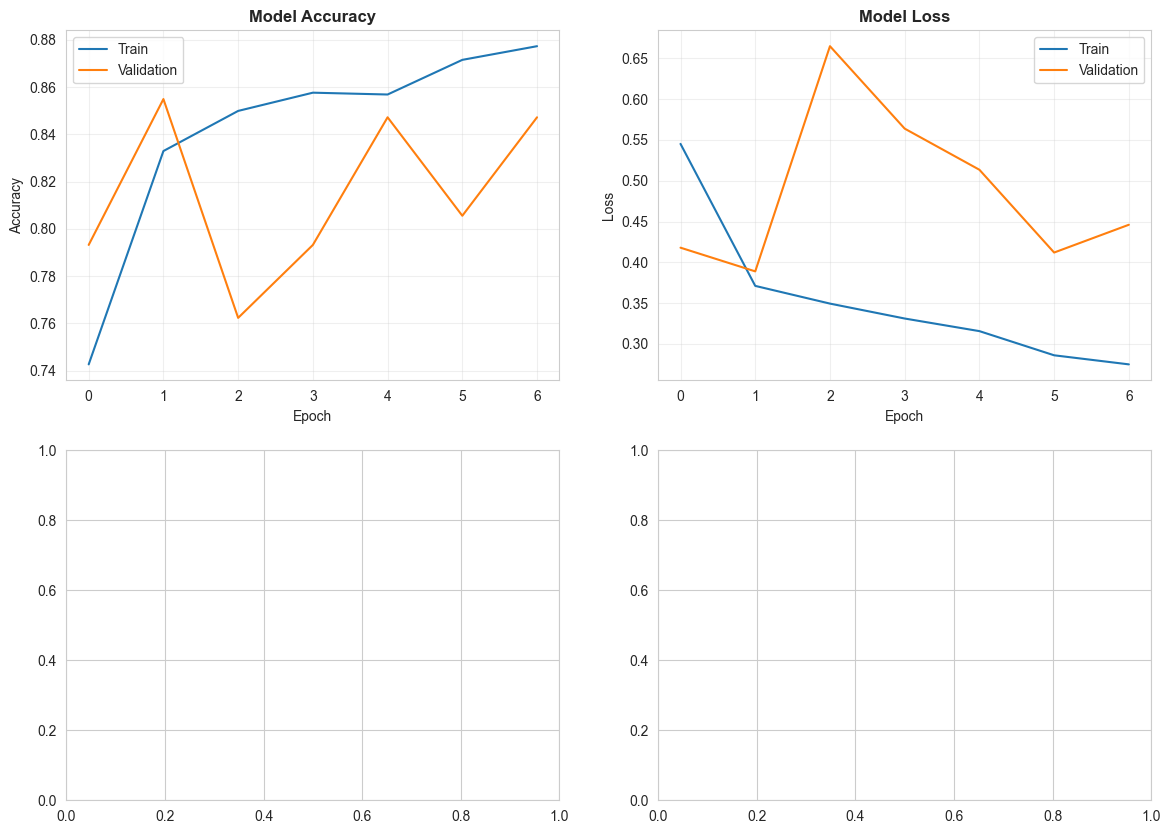

21/21 [==============================] - 2s 91ms/step
Predictions shape: (648,)
Sample predictions: [0 0 0 0 0 0 1 0 1 0]

Model Performance Metrics:
Accuracy:  0.8549
Precision: 0.6489
Recall:    0.6391
F1 Score:  0.6439
AUC-ROC:   0.8998

Detailed Classification Report:
Predictions shape: (648,)
Sample predictions: [0 0 0 0 0 0 1 0 1 0]

Model Performance Metrics:
Accuracy:  0.8549
Precision: 0.6489
Recall:    0.6391
F1 Score:  0.6439
AUC-ROC:   0.8998

Detailed Classification Report:
              precision    recall  f1-score   support

      Normal       0.91      0.91      0.91       515
    Abnormal       0.65      0.64      0.64       133

    accuracy                           0.85       648
   macro avg       0.78      0.77      0.78       648
weighted avg       0.85      0.85      0.85       648

              precision    recall  f1-score   support

      Normal       0.91      0.91      0.91       515
    Abnormal       0.65      0.64      0.64       133

    accuracy     

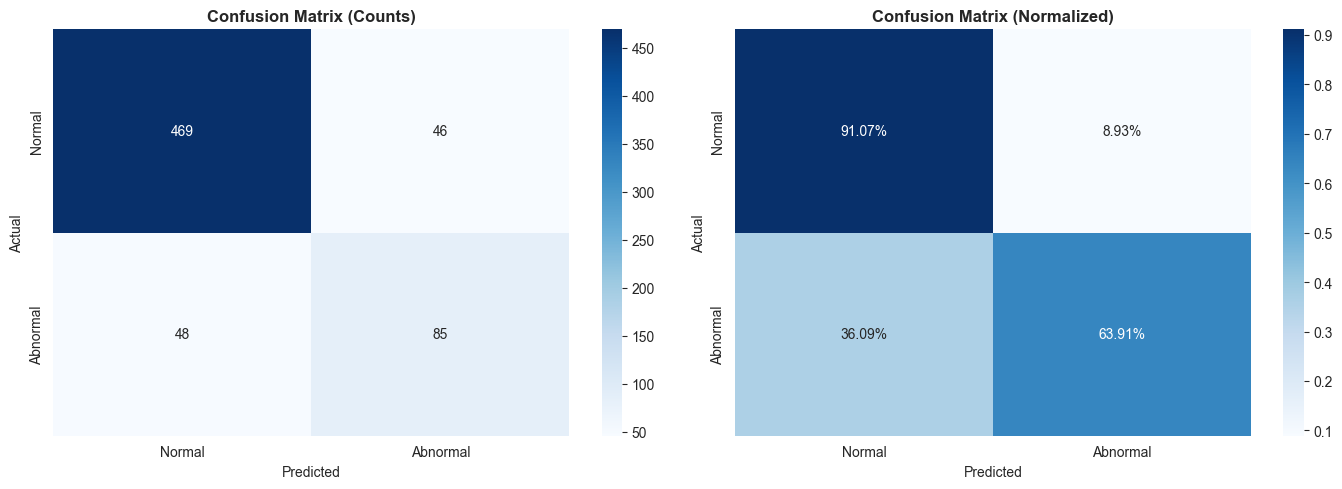

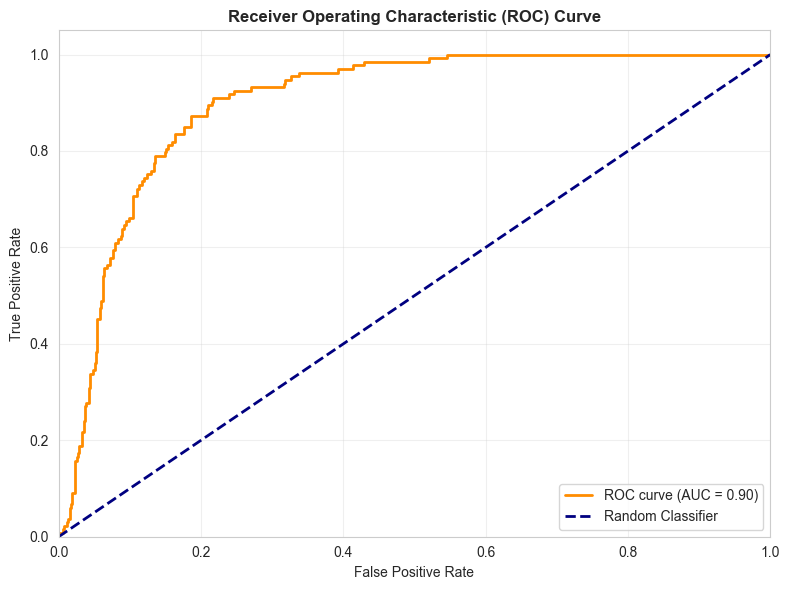


Metrics Summary Table:
   Metric    Value
 Accuracy 0.854938
Precision 0.648855
   Recall 0.639098
 F1 Score 0.643939
  AUC-ROC 0.899803

Metrics saved to ../outputs/metrics_summary.csv

Notebook execution complete!
All visualizations saved to ../outputs/
Model saved to ../models/cardiac_cnn_model.h5


In [10]:

# Plot Training History
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy
axes[0, 0].plot(history.history['accuracy'], label='Train')
axes[0, 0].plot(history.history['val_accuracy'], label='Validation')
axes[0, 0].set_title('Model Accuracy', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Loss
axes[0, 1].plot(history.history['loss'], label='Train')
axes[0, 1].plot(history.history['val_loss'], label='Validation')
axes[0, 1].set_title('Model Loss', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Precision
plt.savefig('../outputs/training_history.png', dpi=300, bbox_inches='tight')
plt.show()

# Make Predictions
y_pred_proba = model.predict(X_val)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

print(f"Predictions shape: {y_pred.shape}")
print(f"Sample predictions: {y_pred[:10]}")

# Calculate Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred_proba)

print("\nModel Performance Metrics:")
print("=" * 50)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC-ROC:   {auc:.4f}")
print("=" * 50)

# Classification report
print("\nDetailed Classification Report:")
print(classification_report(y_val, y_pred, target_names=['Normal', 'Abnormal']))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion matrix (counts)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Normal', 'Abnormal'],
            yticklabels=['Normal', 'Abnormal'])
axes[0].set_title('Confusion Matrix (Counts)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion matrix (normalized)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', ax=axes[1],
            xticklabels=['Normal', 'Abnormal'],
            yticklabels=['Normal', 'Abnormal'])
axes[1].set_title('Confusion Matrix (Normalized)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.savefig('../outputs/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=12, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary Metrics Table
metrics_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'],
    'Value': [accuracy, precision, recall, f1, auc]
})

print("\nMetrics Summary Table:")
print(metrics_summary.to_string(index=False))

# Save metrics
Path('../outputs').mkdir(exist_ok=True)
metrics_summary.to_csv('../outputs/metrics_summary.csv', index=False)
print("\nMetrics saved to ../outputs/metrics_summary.csv")

print("\nNotebook execution complete!")
print("All visualizations saved to ../outputs/")
print("Model saved to ../models/cardiac_cnn_model.h5")